# Acidentes de Trânsito em Recife (com e sem vítimas) no ano de 2020

Inicialmente apenas 2020 mas a intenção é juntar com as bases dos outros anos

In [58]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [59]:
main_df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/44087d2d-73b5-4ab3-9bd8-78da7436eed1/resource/fc1c8460-0406-4fff-b51a-e79205d1f1ab/download/acidentes_2020-novo.csv', sep=';')

In [60]:
main_df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central


In [61]:
main_df.shape

(4092, 38)

In [62]:
main_df.columns

Index(['data', 'hora', 'natureza_acidente', 'situacao', 'bairro', 'endereco',
       'numero', 'detalhe_endereco_acidente', 'complemento',
       'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'tipo', 'descricao',
       'auto', 'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais', 'acidente_verificado',
       'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via',
       'conservacao_via', 'ponto_controle', 'situacao_placa',
       'velocidade_max_via', 'mao_direcao', 'divisao_via1', 'divisao_via2',
       'divisao_via3'],
      dtype='object')

In [63]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       4092 non-null   object 
 1   hora                       4092 non-null   object 
 2   natureza_acidente          4091 non-null   object 
 3   situacao                   4091 non-null   object 
 4   bairro                     4058 non-null   object 
 5   endereco                   4079 non-null   object 
 6   numero                     2317 non-null   object 
 7   detalhe_endereco_acidente  1673 non-null   object 
 8   complemento                3614 non-null   object 
 9   bairro_cruzamento          4057 non-null   object 
 10  num_semaforo               1133 non-null   float64
 11  sentido_via                2845 non-null   object 
 12  tipo                       4092 non-null   object 
 13  descricao                  3988 non-null   objec

In [39]:
df = json.load(open('acidentes-de-transito.json', encoding='utf-8'))
campos_df = pd.DataFrame(df['metadados']['campos']).drop(['tamanho', 'valores_permitidos', 'tipo'], axis=1)
campos_df

,codigo,descricao
0,tipo,Tipo do Acidente se foi com ou sem vitimas
1,situacao,Situação do atendimento
2,data,data do atendimento
3,hora,hora do atendimento
4,bairro,Bairro do acidente
5,endereco,Endereço do acidente
6,numero,Número do acidente
7,complemento,Complemento do acidente
8,natureza,Tipo de Ocorrencia
9,descricao,Descrição do acidente


In [40]:
to_drop = list(filter(lambda x: x not in list(campos_df['codigo']), main_df.columns))
to_drop

['natureza_acidente',
 'detalhe_endereco_acidente',
 'bairro_cruzamento',
 'num_semaforo',
 'sentido_via',
 'acidente_verificado',
 'tempo_clima',
 'situacao_semaforo',
 'sinalizacao',
 'condicao_via',
 'conservacao_via',
 'ponto_controle',
 'situacao_placa',
 'velocidade_max_via',
 'mao_direcao',
 'divisao_via1',
 'divisao_via2',
 'divisao_via3']

In [41]:
main_df = main_df.drop(to_drop, axis=1)

In [42]:
main_df.head()

,data,hora,situacao,bairro,endereco,numero,complemento,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais
0,2020-01-01,00:39:00,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,EM FRENTE A IGREJA UNIVERSAL,COLISÃO,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2020-01-01,01:04:00,FINALIZADA,CORDEIRO,AV CAXANGA,1444,NaN,ABALROAMENTO LONGITUDINAL,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2020-01-01,02:16:00,FINALIZADA,AREIAS,AV RECIFE,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,CHOQUE VEÍCULO PARADO,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,2020-01-01,02:22:00,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,COLISÃO TRASEIRA,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,2020-01-01,03:33:00,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,ABALROAMENTO TRANSVERSAL,COLISÃOENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


#### Verificando elementos faltantes

In [43]:
# Quantidade de elementos faltantes por coluna
main_df.isna().sum()

data                0
hora                0
situacao            1
bairro             34
endereco           13
numero           1775
complemento       478
tipo                0
descricao         104
auto              608
moto             2400
ciclom           4073
ciclista         3940
pedestre         3937
onibus           3601
caminhao         3797
viatura          4020
outros           4032
vitimas            14
vitimasfatais    4071
dtype: int64

Como na coluna de bairros existem apenas 34 elementos sem valor, optei por remover essas linhas do dataframe

In [44]:
main_df = main_df[main_df['bairro'].notna()]
main_df.shape

(4058, 20)

In [45]:
main_df.isna().sum()

data                0
hora                0
situacao            1
bairro              0
endereco           12
numero           1756
complemento       471
tipo                0
descricao         102
auto              605
moto             2369
ciclom           4039
ciclista         3906
pedestre         3903
onibus           3572
caminhao         3767
viatura          3986
outros           3998
vitimas            14
vitimasfatais    4037
dtype: int64

In [46]:
main_df = main_df.drop(['endereco', 'numero', 'complemento', 'descricao', 'situacao'], axis=1)

Pela descrição da base e observando seus valores, percebe-se que nas colunas referentes ao tipo de envolvido em um acidente, o elemento faltante significa que não houve envolvimento no acidente. Dessa forma, elementos faltantes serão substituidos por 0.

In [47]:
for col in ['auto','moto','ciclom', 'ciclista','pedestre','onibus','caminhao','viatura', 'outros']:
    main_df[col].fillna(0, inplace=True)

In [48]:
main_df.isna().sum()

data                0
hora                0
bairro              0
tipo                0
auto                0
moto                0
ciclom              0
ciclista            0
pedestre            0
onibus              0
caminhao            0
viatura             0
outros              0
vitimas            14
vitimasfatais    4037
dtype: int64

In [49]:
main_df.dtypes

data              object
hora              object
bairro            object
tipo              object
auto             float64
moto             float64
ciclom           float64
ciclista         float64
pedestre         float64
onibus           float64
caminhao         float64
viatura          float64
outros           float64
vitimas          float64
vitimasfatais    float64
dtype: object

In [50]:
main_df['bairro'] = main_df['bairro'].astype('category')
main_df['tipo'] = main_df['tipo'].astype('category')

In [51]:
main_df['tipo'].value_counts()

COLISÃO                      997
ABALROAMENTO LONGITUDINAL    955
COLISÃO TRASEIRA             663
ABALROAMENTO TRANSVERSAL     636
COLISÃO FRONTAL              150
ATROPELAMENTO                148
CHOQUE OBJETO FIXO           146
COLISÃO COM CICLISTA         140
CHOQUE VEÍCULO PARADO        100
TOMBAMENTO                    39
CHOQUE                        31
ENGAVETAMENTO                 23
CAPOTAMENTO                   13
ACID. DE PERCURSO             11
ATROPELAMENTO ANIMAL           6
Name: tipo, dtype: int64

In [52]:
import datetime
def getMonth(x):
    data=datetime.datetime.strptime(x, "%Y-%m-%d")
    return data.strftime("%B")

main_df['mes'] = main_df['data'].apply(getMonth)

In [53]:
main_df

,data,hora,bairro,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,mes
0,2020-01-01,00:39:00,ÁGUA FRIA,COLISÃO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
1,2020-01-01,01:04:00,CORDEIRO,ABALROAMENTO LONGITUDINAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
2,2020-01-01,02:16:00,AREIAS,CHOQUE VEÍCULO PARADO,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
3,2020-01-01,02:22:00,BOA VIAGEM,COLISÃO TRASEIRA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
4,2020-01-01,03:33:00,PAISSANDU,ABALROAMENTO TRANSVERSAL,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,2020-12-30,17:30:00,DERBY,COLISÃO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,December
4088,2020-12-30,18:57:00,ARRUDA,COLISÃO,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,December
4089,2020-12-30,20:38:00,MANGABEIRA,ATROPELAMENTO,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,December
4090,2020-12-31,15:47:00,CASA AMARELA,COLISÃO FRONTAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,December


In [54]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
auto,4058.0,1.252095,0.786425,0.0,1.0,1.0,2.0,6.0
moto,4058.0,0.452193,0.567205,0.0,0.0,0.0,1.0,3.0
ciclom,4058.0,0.004682,0.068274,0.0,0.0,0.0,0.0,1.0
ciclista,4058.0,0.037950,0.193661,0.0,0.0,0.0,0.0,2.0
pedestre,4058.0,0.042139,0.227402,0.0,0.0,0.0,0.0,5.0
onibus,4058.0,0.121735,0.333734,0.0,0.0,0.0,0.0,3.0
caminhao,4058.0,0.073435,0.267414,0.0,0.0,0.0,0.0,2.0
viatura,4058.0,0.017989,0.134770,0.0,0.0,0.0,0.0,2.0
outros,4058.0,0.015278,0.126628,0.0,0.0,0.0,0.0,2.0
vitimas,4044.0,0.516320,0.660897,0.0,0.0,0.0,1.0,5.0


In [55]:
main_df['mes'] = main_df['mes'].astype('category')
main_df.dtypes

data               object
hora               object
bairro           category
tipo             category
auto              float64
moto              float64
ciclom            float64
ciclista          float64
pedestre          float64
onibus            float64
caminhao          float64
viatura           float64
outros            float64
vitimas           float64
vitimasfatais     float64
mes              category
dtype: object

### Visualização

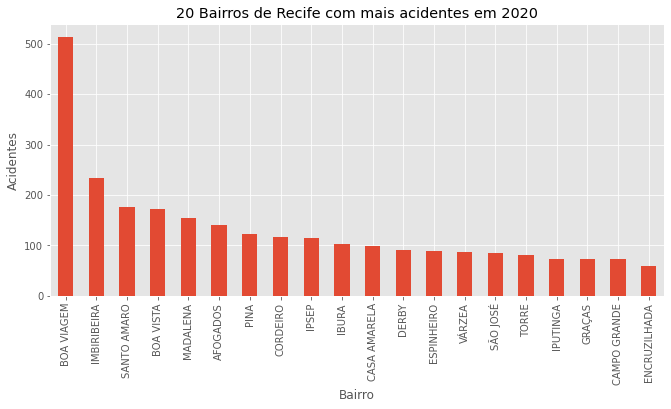

In [56]:
main_df['bairro'].value_counts().head(20).plot(kind='bar', figsize=(11,5))
plt.title("20 Bairros de Recife com mais acidentes em 2020")
plt.xlabel("Bairro")
plt.ylabel("Acidentes")

plt.show()

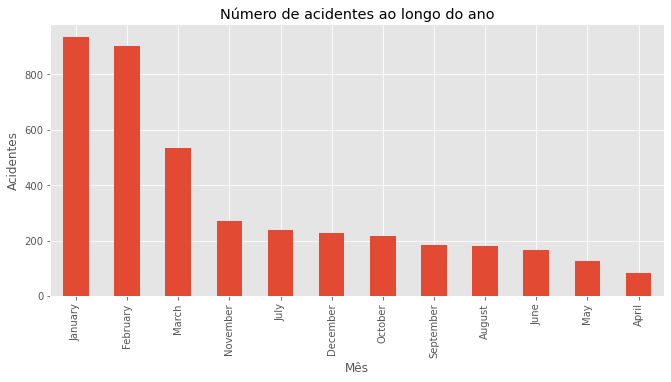

In [57]:
main_df['mes'].value_counts().plot(kind='bar', figsize=(11,5))
plt.title("Número de acidentes ao longo do ano")
plt.xlabel("Mês")
plt.ylabel("Acidentes")

plt.show()

### MAIN TODO:
    - Ver o que é possível fazer a partir da coluna de hora
    - Revisar dicionário dos dados pra ver se alguma coluna importante foi dropada
    - Organizar as colunas de vítimas e vítimas fatais
    - plotar mapa com folium
    - criar visualizações para tipos de veículos em acidentes (fillna com 0)
    - criar visualização para tipo de acidente
    - derivar novos dataframes
    - procurar novos dados para adicionar
    - Adicionar datasets dos outros anos disponíveis